#### **Exploring Animal Species Detection using Deep Learning**

In recent years, deep learning techniques have revolutionized the field of computer vision, enabling us to tackle complex tasks such as object detection with remarkable accuracy. One such technique is YOLOv8 (You Only Look Once version 8), a state-of-the-art object detection algorithm. In this project, we explore the application of YOLOv8 in the context of animal species detection.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import random
%matplotlib inline
from matplotlib.image import imread
import matplotlib.image as mpimg
import cv2

In [3]:
# Set the data directory and folders
data_dir = '/content/drive/MyDrive/Colab_Notebooks/raw'
folders = os.listdir(data_dir)

for folder in folders:
    print(folder)

zebra
rhino
panda
lion
elephant
buffalo
fox
tiger
cheetah
jaguar


### **Dataset Overview**

In [4]:
# Create empty lists to store the image files and text files
image_paths = []
annotation_paths = []

# Iterate over the folders
for folder in folders:
    folder_path = os.path.join(data_dir, folder)
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
    annotation_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
    image_paths.extend([os.path.join(folder_path, f) for f in image_files])
    annotation_paths.extend([os.path.join(folder_path, f) for f in annotation_files])

# Print the total number of images and annotations
print("Total number of images:", len(image_paths))
print("Total number of annotation files:", len(annotation_paths))

Total number of images: 2609
Total number of annotation files: 2612


### **Observations**:
Our dataset consists of a diverse range of animal species, including zebras, rhinos, pandas, lions, elephants, buffalos, foxes, tigers, cheetahs, and jaguars. It comprises a total of 2609 images, each accompanied by an annotation file. These annotations provide information about the bounding boxes surrounding the animals in the images, allowing us to train our deep learning model.

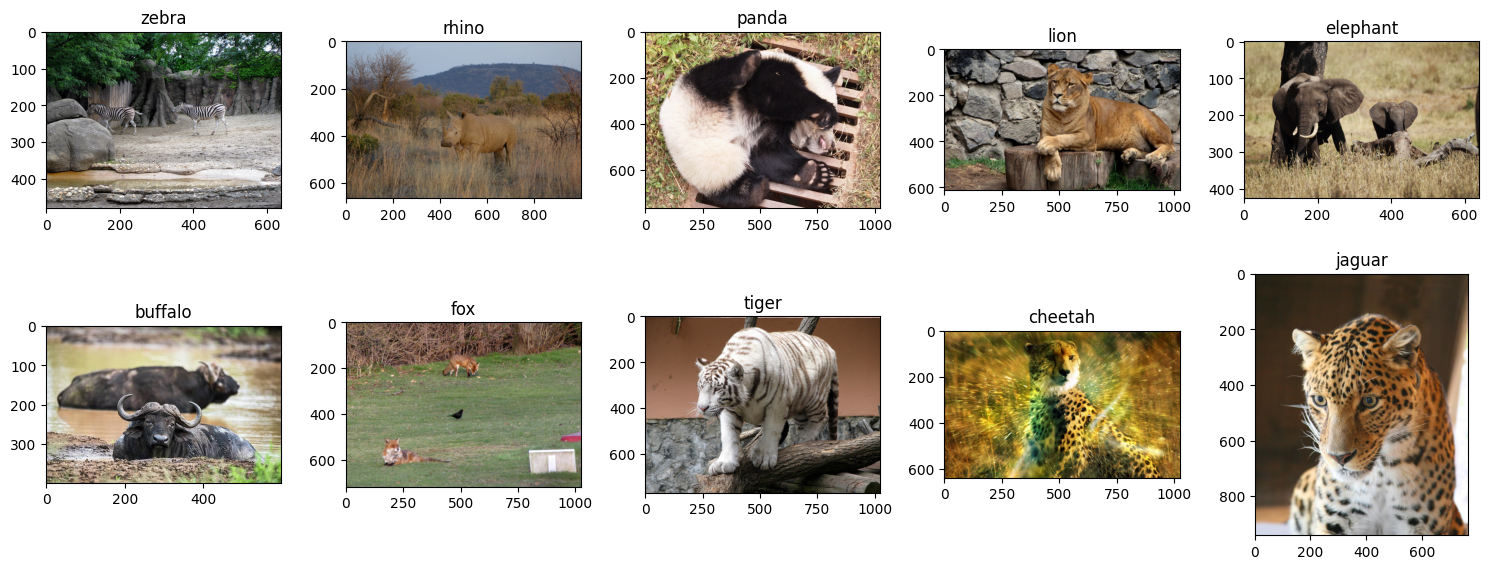

In [5]:
# Create subplots to display one image from each folder
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.ravel()

# Loop through the folders and display one image from each folder
for i, folder in enumerate(folders):
    folder_path = os.path.join(data_dir, folder)
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
    sample_image_path = os.path.join(folder_path, image_files[0])
    image = cv2.imread(sample_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axs[i].imshow(image)
    axs[i].set_title(folder)
    axs[i].axis()

plt.tight_layout()
plt.show()

In [6]:
# Class label and image count
class_labels = []
image_counts = []

# Iterate through each folder
for folder in folders:
    folder_path = os.path.join(data_dir, folder)
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
    class_labels.append(folder)
    image_counts.append(len(image_files))

# Create a dataframe
df = pd.DataFrame({'Class Label': class_labels, 'Image Count': image_counts})
df

,Class Label,Image Count
0,zebra,376
1,rhino,376
2,panda,91
3,lion,208
4,elephant,375
5,buffalo,375
6,fox,150
7,tiger,291
8,cheetah,194
9,jaguar,173


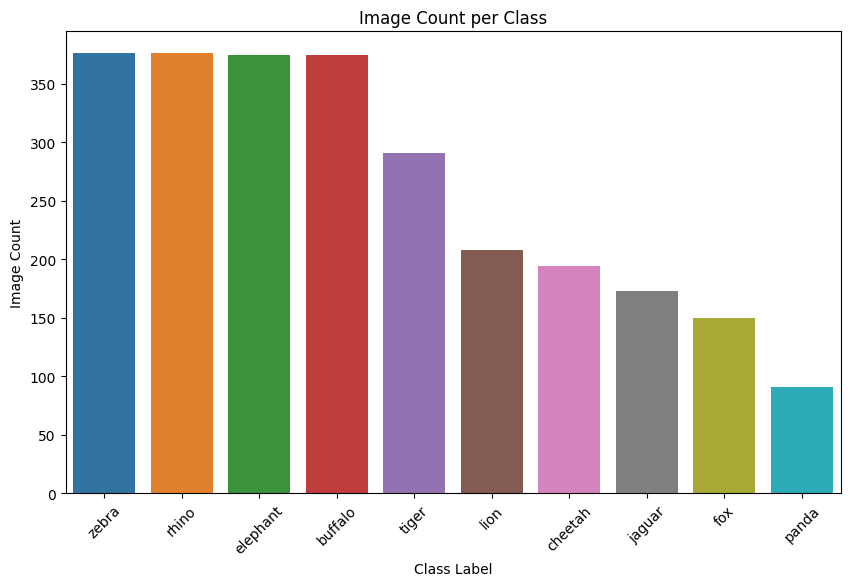

In [7]:
# Sort the dataframe by image count
df_sorted = df.sort_values('Image Count', ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Class Label', y='Image Count', data=df_sorted)
plt.xticks(rotation=45)
plt.xlabel('Class Label')
plt.ylabel('Image Count')
plt.title('Image Count per Class')
plt.show()

#### **Number of objects per image file**

In [8]:
# Create an empty dictionary to store the count of images per number of objects
num_objects_count = {}

# Iterate over the annotation files
for annot_path in annotation_paths:
    with open(annot_path, 'r') as f:
        annot_data = f.readlines()
    num_objects = len(annot_data)

    # Increment the count for the corresponding number of objects
    if num_objects in num_objects_count:
        num_objects_count[num_objects] += 1
    else:
        num_objects_count[num_objects] = 1

# Create a dataframe from the num_objects_count dictionary
obj_df = pd.DataFrame({'Number of Objects': list(num_objects_count.keys()),
                       'Count': list(num_objects_count.values())})
obj_df

,Number of Objects,Count
0,2,466
1,3,135
2,1,1893
3,25,1
4,4,54
5,11,1
6,5,25
7,6,21
8,8,3
9,7,6


In [9]:
# Create an empty list to store the image files with 25 objects
image_files_25_objects = []

# Iterate over the annotation files
for annot_path in annotation_paths:
    with open(annot_path, 'r') as f:
        annot_data = f.readlines()
    num_objects = len(annot_data)

    # Check if the number of objects is 25
    if num_objects == 25:
        image_files_25_objects.append(annot_path)

# Print the image files with 25 objects
print(image_files_25_objects)

['/content/drive/MyDrive/Colab_Notebooks/raw/zebra/121.txt']


### Observations:
We also observed that the dataset contains images of various animal species, with the corresponding count for each class label.

- **Class Distribution**: The dataset is well-balanced, with each animal species having a substantial representation. The zebras and rhinos have the highest count with 376 images each, while the panda class has the lowest count with 91 images.
- **Number of Objects per Image**: We also analyzed the distribution of the number of objects per image.

These findings provide valuable insights into the complexity and diversity of the dataset. It is worth noting that the majority of images contain only one or two objects, while a few images exhibit a higher number of objects.

In [10]:
# Pixels and Aspect Ration of Image files
image_dimensions = []

# Iterate through the images
for image_path in image_paths:
    image = cv2.imread(image_path)
    height, width, _ = image.shape
    aspect_ratio = width / height
    pixels = height * width
    image_dimensions.append({'Image Path': image_path,
                             'Height': height,
                             'Width': width,
                             'Aspect Ratio': aspect_ratio,
                             'Pixels': pixels})

# Create a dataframe
df_dimensions = pd.DataFrame(image_dimensions)
df_dimensions

,Image Path,Height,Width,Aspect Ratio,Pixels
0,/content/drive/MyDrive/Colab_Notebooks/raw/zeb...,480,640,1.333333,307200
1,/content/drive/MyDrive/Colab_Notebooks/raw/zeb...,640,427,0.667188,273280
2,/content/drive/MyDrive/Colab_Notebooks/raw/zeb...,711,1024,1.440225,728064
3,/content/drive/MyDrive/Colab_Notebooks/raw/zeb...,640,427,0.667188,273280
4,/content/drive/MyDrive/Colab_Notebooks/raw/zeb...,604,640,1.059603,386560
...,...,...,...,...,...
2604,/content/drive/MyDrive/Colab_Notebooks/raw/jag...,3258,4704,1.443831,15325632
2605,/content/drive/MyDrive/Colab_Notebooks/raw/jag...,1920,1080,0.562500,2073600
2606,/content/drive/MyDrive/Colab_Notebooks/raw/jag...,294,520,1.768707,152880
2607,/content/drive/MyDrive/Colab_Notebooks/raw/jag...,404,600,1.485149,242400


In [11]:
# Summary statistics of image dimensions
df_dimensions.describe()

,Height,Width,Aspect Ratio,Pixels
count,2609.000000,2609.000000,2609.000000,2.609000e+03
mean,680.756995,937.675738,1.416894,8.221119e+05
std,380.602572,545.998171,0.316714,1.466427e+06
min,86.000000,99.000000,0.560156,1.109400e+04
25%,435.000000,640.000000,1.333333,2.739200e+05
50%,678.000000,992.000000,1.498829,6.942720e+05
75%,768.000000,1024.000000,1.505882,7.864320e+05
max,3888.000000,5666.000000,3.341067,1.996186e+07


- The image dataset has an average height of 680.76 pixels, ranging from a minimum of 86 pixels to a maximum of 3888 pixels.
- The average width is 937.68 pixels, with a range from 99 pixels to 5666 pixels.
- The aspect ratio, which measures the width-to-height ratio, has an average value of 1.42. The aspect ratios vary across the dataset, with a minimum of 0.56 and a maximum of 3.34.
- The standard deviation for both height and width indicates some variation in the dataset, while the aspect ratio standard deviation suggests moderate variability.

In [12]:
# Correlation between height, width, and aspect ratio
dim_corr = df_dimensions[['Height', 'Width', 'Aspect Ratio']].corr()
dim_corr

,Height,Width,Aspect Ratio
Height,1.000000,0.884724,-0.223117
Width,0.884724,1.000000,0.211935
Aspect Ratio,-0.223117,0.211935,1.000000


<ipython-input-17-a0712ac5daa1>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(dim_corr, dtype=np.bool)


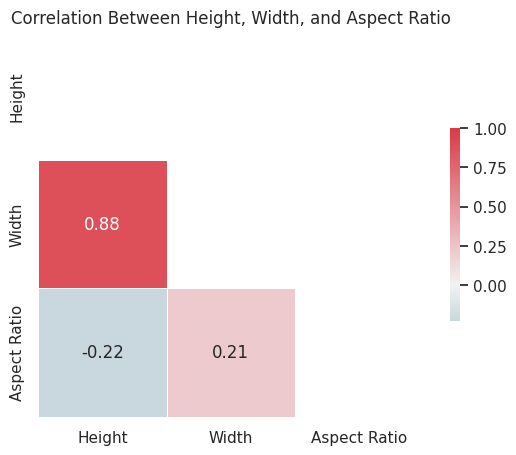

In [17]:
# Correlation between height, width, and aspect ratio
dim_corr = df_dimensions[['Height', 'Width', 'Aspect Ratio']].corr()

# Plot the heatmap
#sns.set(style="white")
mask = np.zeros_like(dim_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(7, 5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(dim_corr, annot=True,
            mask=mask, cmap=cmap, vmax=1,
            center=0, square=True, linewidths=.5,
            cbar_kws={"shrink": .5})
plt.title('Correlation Between Height, Width, and Aspect Ratio')
plt.show()

From the correlation table, there is a strong positive correlation between the height and width of the images, with a correlation coefficient of 0.88. This suggests that images with larger heights also tend to have larger widths. However, there is a weak negative correlation (-0.22) between the height and aspect ratio, indicating that as the height increases, the aspect ratio tends to decrease slightly. The correlation between the width and aspect ratio is weakly positive (0.21), implying that as the width increases, the aspect ratio also increases slightly.

### **Summary**

The aspect ratio of an image plays a crucial role in object detection algorithms. Extreme aspect ratios can hinder accurate object detection and classification, as algorithms are typically trained on images with more balanced aspect ratios. Maintaining a balanced aspect ratio ensures visual appeal and compatibility across different platforms. Data preprocessing techniques like resizing or cropping can be used to adjust the aspect ratio for optimal object detection performance. Training models on images with diverse aspect ratios improves their ability to handle varied proportions and enhances overall efficiency. Considering and understanding image dimensions, particularly aspect ratio, is vital for optimizing object detection algorithms and achieving accurate results.

These statistics provide insights into the size and proportions of the images in the dataset. Understanding the distribution and relationships between these dimensions can help optimize the training process and ensure accurate object detection using the YOLOv8 algorithm.

